In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [3]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).


Arguments:
    path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).

Returns:
    Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train, x_test**: uint8 arrays of grayscale image data with shapes
      (num_samples, 28, 28).

    **y_train, y_test**: uint8 arrays of digit labels (integers in range 0-9)
      with shapes (num_samples,).

License:
    Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
    which is a derivative work from original NIST datasets.
    MNIST dataset is made available under the terms of the
    [Creative Commons Attribution-Share Alike 3.0 license.](
    https://creativecommons.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
def images(i):
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.show()

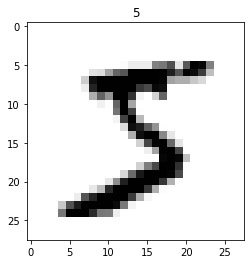

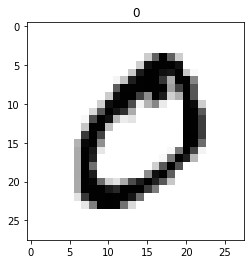

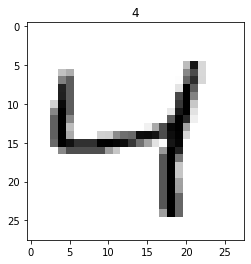

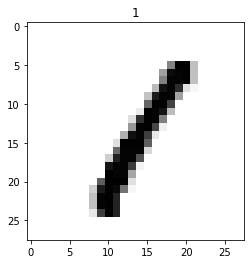

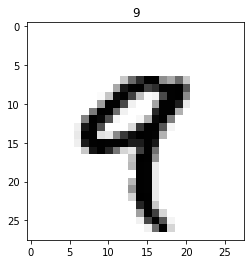

In [6]:
for i in range(5):
    images(i)

In [7]:
# Normalizing
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [8]:
# converting to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [13]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es =EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

mc =ModelCheckpoint("./bestmodel.h5", monitor="val_acc", verbose = 1, save_best_only=True)

cb = [es,mc]

In [15]:
his = model.fit(X_train,y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1313/1313 [==============================] - 31s 24ms/step - loss: 0.2189 - accuracy: 0.9328 - val_loss: 0.0848 - val_accuracy: 0.9742
Epoch 2/50
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0716 - accuracy: 0.9781 - val_loss: 0.0562 - val_accuracy: 0.9824
Epoch 3/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0565 - accuracy: 0.9824 - val_loss: 0.0551 - val_accuracy: 0.9828
Epoch 4/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 5/50
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0430 - val_accuracy: 0.9874
Epoch 6/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.0459 - val_accuracy: 0.9861
Epoch 7/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0380 -

Epoch 19/50
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0106 - accuracy: 0.9960 - val_loss: 0.0535 - val_accuracy: 0.9881
Epoch 20/50
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0475 - val_accuracy: 0.9897
Epoch 21/50
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0096 - accuracy: 0.9966 - val_loss: 0.0455 - val_accuracy: 0.9903
Epoch 22/50
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0099 - accuracy: 0.9965 - val_loss: 0.0476 - val_accuracy: 0.9898
Epoch 23/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0085 - accuracy: 0.9968 - val_loss: 0.0455 - val_accuracy: 0.9908
Epoch 24/50
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0461 - val_accuracy: 0.9900
Epoch 25/50
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0

Epoch 37/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0056 - accuracy: 0.9979 - val_loss: 0.0623 - val_accuracy: 0.9902
Epoch 38/50
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0507 - val_accuracy: 0.9911
Epoch 39/50
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0562 - val_accuracy: 0.9908
Epoch 40/50
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0570 - val_accuracy: 0.9902
Epoch 41/50
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0618 - val_accuracy: 0.9898
Epoch 42/50
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0553 - val_accuracy: 0.9904
Epoch 43/50
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0

In [16]:
model.save('bestmodel.h5')

In [5]:
net = keras.models.load_model('bestmodel.h5')

In [8]:
prediction = net.predict([X_test])

In [9]:
print(prediction)

[[5.13982239e-18 7.04425904e-23 1.07184075e-12 ... 1.00000000e+00
  4.92513766e-16 1.78344709e-12]
 [5.39035559e-13 1.17034678e-13 1.00000000e+00 ... 3.72536841e-24
  6.83900500e-14 7.07841183e-24]
 [1.72022161e-16 9.99999881e-01 1.15844712e-13 ... 4.93125263e-10
  2.55077574e-11 1.68879184e-15]
 ...
 [1.81459924e-35 8.52344782e-25 1.07085515e-32 ... 6.93787290e-25
  1.11687821e-17 1.65335637e-23]
 [7.22461750e-13 2.15127849e-29 1.87179623e-21 ... 1.35279043e-27
  1.95796997e-06 7.28545161e-16]
 [1.32974591e-16 7.82721888e-27 1.18839887e-16 ... 7.05050212e-29
  2.95425143e-13 6.88918304e-19]]


In [13]:
print(np.argmax(prediction[1]))

2


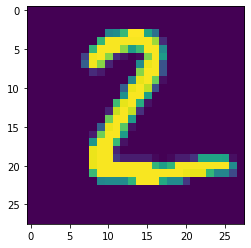

In [14]:
plt.imshow(X_test[1])